In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('UniversalBank.csv') 
data.isna().sum()


ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [3]:
data.drop(["ID","ZIP Code"], axis=1, inplace=True)

In [4]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Matrix')

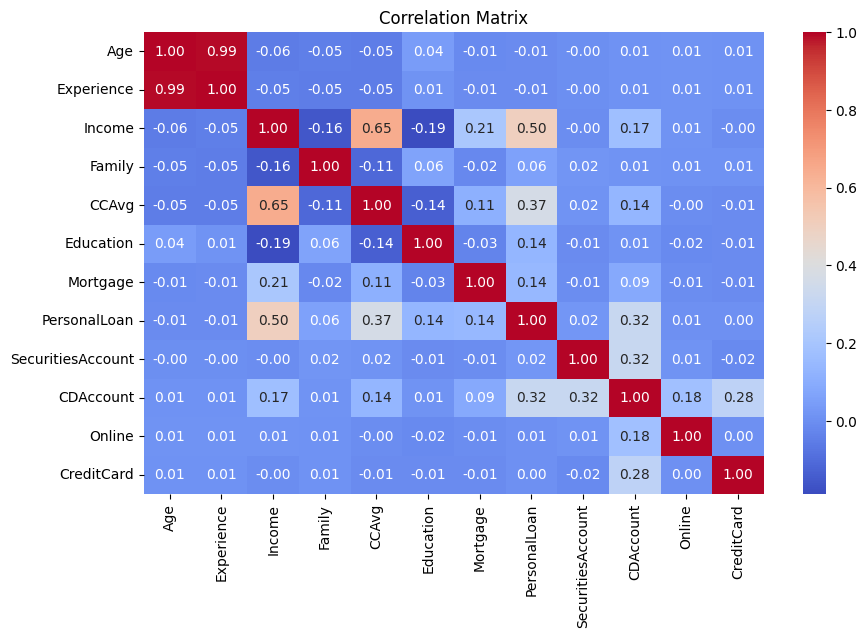

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')

In [6]:
zero_class = data[data["CreditCard"]==0].reset_index(drop=True)
one_class = data[data["CreditCard"]==1].reset_index(drop=True)
print(zero_class.shape, one_class.shape)

(3530, 12) (1470, 12)


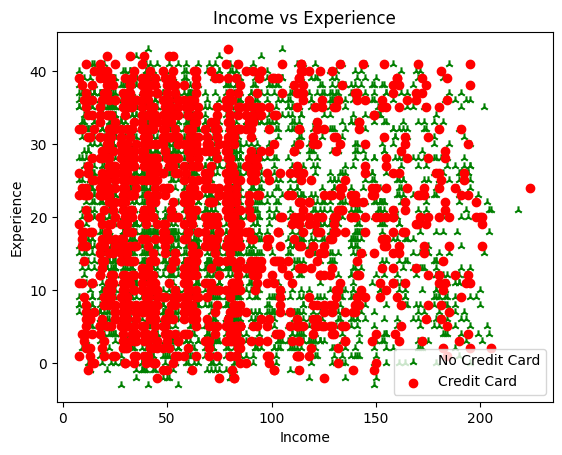

In [7]:
plt.scatter(zero_class['Income'],zero_class["Experience"],color="green",marker="2")
plt.scatter(one_class['Income'],one_class["Experience"],color="red",marker="o")
plt.xlabel("Income")
plt.ylabel("Experience")
plt.title("Income vs Experience")
plt.legend(["No Credit Card","Credit Card"])
plt.show()

In [8]:
## standard scaller

scaler = StandardScaler()
X = data.drop("CreditCard", axis=1)
y = data["CreditCard"]
X_scaled = scaler.fit_transform(X)
x=pd.DataFrame(X_scaled)

In [9]:
## train test split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(4000, 11) (1000, 11)
(4000,) (1000,)


In [10]:
## svc
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
y_pred= model.predict(X_test)
print(model.score(X_test, y_test))
cnfmtrx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.752
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       708
           1       0.85      0.18      0.30       292

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.69      1000



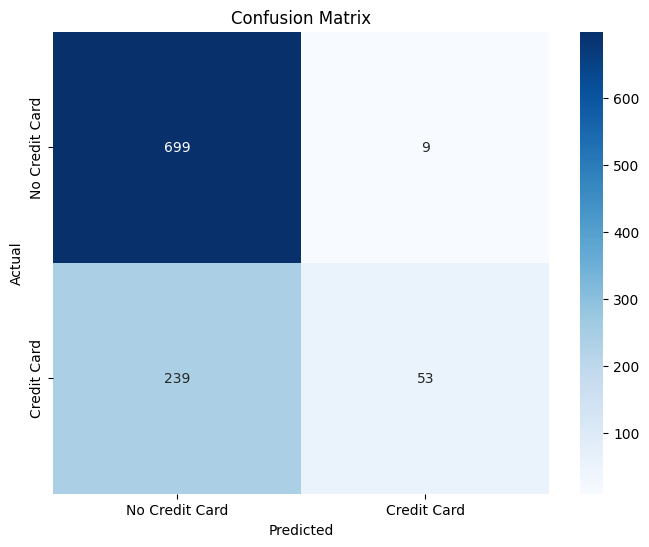

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnfmtrx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['No Credit Card', 'Credit Card'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Credit Card', 'Credit Card'])
plt.show()